In [185]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as ssp
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy import integrate

# Problem 1 

In [110]:
number, mass, uncert = np.loadtxt( 'Wmass_data.txt', unpack = True)

## Part b

In [111]:
error_weighted_mean= np.average(mass, weights= uncert**2)
error_weighted_mean
PDG=80.379
perror=(np.abs(error_weighted_mean-PDG)/PDG) *100

print("Error Weighted Mean:", error_weighted_mean, ", The weighted mean has a perecent error of", perror)

Error Weighted Mean: 80.40834310281743 , The weighted mean has a perecent error of 0.03650593167048749


## Part c 

In [112]:
ChiSqr= np.sum((mass-PDG)**2/uncert**2)
DOF= len(number)-2 #-2 is because there is only one param. and then the typical -1 
Reduced_ChiSqr= ChiSqr/ DOF
P_Value= ssp.gammaincc(DOF/2, ChiSqr/2)


print("The Chi Squared value is: ", ChiSqr)
print("The reduced Chi Sqared value is:" , Reduced_ChiSqr)
print("The P value is:", P_Value)

The Chi Squared value is:  8.707036304862834
The reduced Chi Sqared value is: 1.243862329266119
The P value is: 0.2743795204721061


## Part d

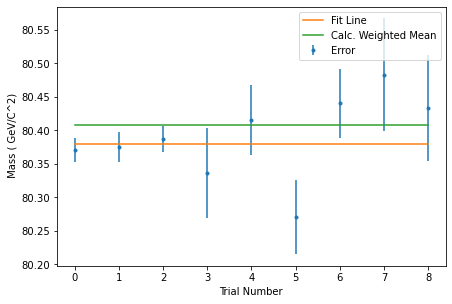

In [113]:
fig= plt.figure()
axes= fig.add_axes([0.9,0.9,0.9,0.9])
axes.errorbar(number, mass, uncert, fmt= '.', label = "Error")


numberlist=[]
for i in range (len(number)):
    numberlist.insert(i, PDG)
    
axes.plot(number, numberlist, label="Fit Line")



errorlist= []
for i in range (len(number)):
    errorlist.insert(i, error_weighted_mean)

axes.plot(number, errorlist, label= "Calc. Weighted Mean")



axes.set_xlabel("Trial Number")
axes.set_ylabel(" Mass ( GeV/C^2)")
axes.legend();

# Problem 2

In [114]:
exp_number, radius, r_uncert =np.loadtxt('proton_radius_data.txt', unpack= True)

### Part b

In [115]:
R_ew_mean= np.average(radius, weights= r_uncert)
print("The error weighted mean of the proton charge radius is:", R_ew_mean)
P_PDG= 0.8751 

P_Error= np.abs(P_PDG- R_ew_mean)/P_PDG *100
print("The percent error between the error weighted mean and the PDG value is:", P_Error)

The error weighted mean of the proton charge radius is: 0.8876640673847367
The percent error between the error weighted mean and the PDG value is: 1.435729332046246


### Part c

In [116]:
DOF= len(exp_number)-2 
P_Chisqr=np.sum((radius- P_PDG)**2 / r_uncert**2)
RP_Chisqr= P_Chisqr/DOF
pvalue= ssp.gammaincc(DOF/2, P_Chisqr/2)

print("The Chi Squared value is:", P_Chisqr)
print("The Reduced Chi Sqaured Value is:",  RP_Chisqr)
print("The P value is:", pvalue)

The Chi Squared value is: 10285.48511513286
The Reduced Chi Sqaured Value is: 791.1911627025277
The P value is: 0.0


## Part d

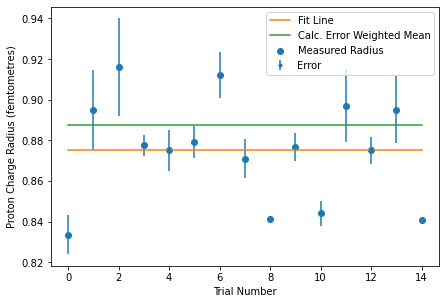

In [117]:
fig2= plt.figure()
axes= fig2.add_axes([0.9,0.9,0.9,0.9])
axes.scatter(exp_number, radius, label= "Measured Radius")
axes.errorbar( exp_number, radius, r_uncert, fmt='.', label= "Error")
axes.set_xlabel("Trial Number")
axes.set_ylabel("Proton Charge Radius (femtometres)")

mtlist=[]
for i in range (len(exp_number)):
    mtlist.insert(i, P_PDG)

nlist= []
for i in range(len(exp_number)):
    nlist.insert(i,R_ew_mean)
    
axes.plot(exp_number, mtlist, label= "Fit Line")
axes.plot(exp_number, nlist, label= "Calc. Error Weighted Mean")
axes.legend();

# Problem 3

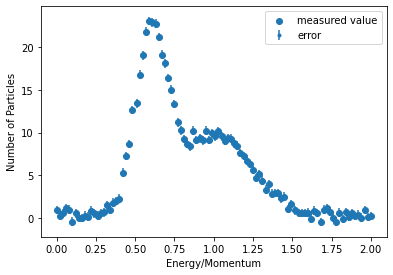

In [118]:
ep, number_part, uncert_number= np.loadtxt('Ep_data.txt', unpack= True)
fig=plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.scatter(ep, number_part, label= "measured value")
axes.errorbar(ep, number_part, uncert_number, fmt='.', label= "error")
axes.set_ylabel('Number of Particles')
axes.set_xlabel('Energy/Momentum');
axes.legend();

## Part b and d

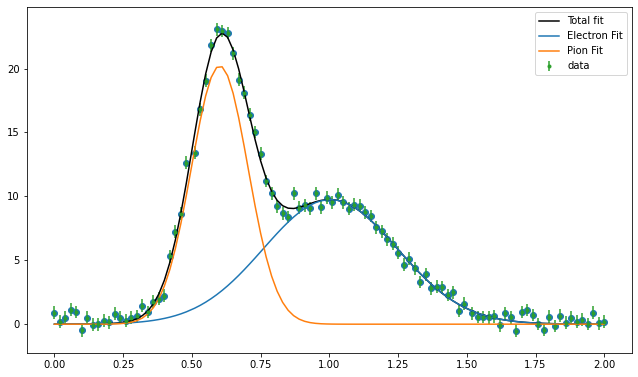

In [202]:
x=ep
y= number_part

def gaussa(x,a1,c1,sig1):
    return a1*np.exp(-1*(x-c1)**2/ (2*sig1))

def gaussb(x, a2,c2, sig2):
    return a2*np.exp(-1*(x-c2)**2/(2*sig2))

def twogauss(x, a1, c1, sig1, a2, c2, sig2):
    return a1*np.exp(-1*(x-c1)**2/ (2*sig1)) + (a2*np.exp(-1*(x-c2)**2/(2*sig2)))

t, v= curve_fit(twogauss, x, y, sigma= uncert_number, absolute_sigma= True)

fig3= plt.figure()
axes= fig3.add_axes([1,1,1.4,1.2])
axes.scatter(x, y)
axes.plot(x, twogauss(x, *t), label= "Total fit", color= "Black")
axes.plot(x, gaussa(x, t[0], t[1], t[2]), label= "Electron Fit")
axes. plot(x, gaussb(x, t[3], t[4], t[5]), label= "Pion Fit")
axes.errorbar(ep, number_part, uncert_number, fmt='.', label= "data",)
axes.legend();

## Part c

In [200]:
list3=[]
for i in range(len(ep)):
    list3.insert (i, t3)
ChiSqr= np.sum((ep-list3)**2/uncert_number**2 )   
DOF3= len(ep)-4
RedChiSqr= ChiSqr/DOF3
PV= ssp.gammaincc(DOF3/2, ChiSqr/2)
print("The Chi Squared value is:", ChiSqr)
print("The Reduced Chi Sqared Value is:", RedChiSqr)
print ("The Degrees of freedom are:",  DOF3)
print ("The P-Value is:", PV)

The Chi Squared value is: 3097470.5916937906
The Reduced Chi Sqared Value is: 32265.318663476985
The Degrees of freedom are: 96
The P-Value is: 0.0


## Part e 

In [255]:
N= 10
limits= np.linspace(0.3, 0.8, N) 
e_tot= integrate.quad(gaussa, 0, 2, args= (t[0], t[1], t[2]))[0]
pi_tot= integrate.quad(gaussb, 0,2, args= (t[3], t[4], t[5]))[0]

e_sig= list()
pi_sig=list()

for i in range (len(limits)):
    ei= integrate.quad(lambda x: gaussa(x,t[0],t[1],t[2]), limits[i], 2)
    e_sig.insert(i, ei[0])

for i in range(len(limits)):
    pi=integrate.quad(lambda x: gaussb(x, t[3], t[4], t[5]),limits[i], 2)
    pi_sig.insert(i, pi[0])
    
e_sig=np.asarray(e_sig)
pi_sig= np.asarray(pi_sig)



## Part f 

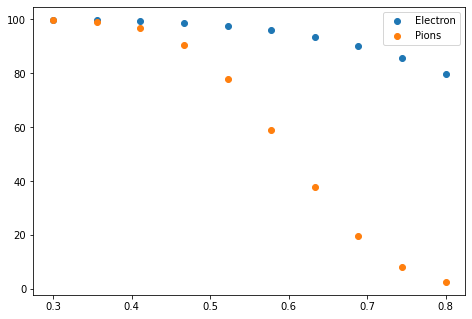

In [257]:
electron_ratio= (e_sig/e_tot)
pion_ratio= (pi_sig/pi_tot)
electron_ratio_percent= (electron_ratio*100)
pion_ratio_percent= (pion_ratio*100)
p1=electron_ratio_percent
p2=pion_ratio_percent
fig4=plt.figure()
axes= fig4.add_axes([1,1,1,1])
axes.scatter(limits, p1 , label = "Electron")
axes.scatter(limits, p2, label= "Pions")
axes.legend();

## Part g 

In [266]:
print(p1)
print(p2)

[99.80850553 99.6119747  99.25235587 98.62752968 97.59671315 95.98194897
 93.58011681 90.18791082 85.63878479 79.84609787]
[99.82853353 99.14991313 96.76236508 90.44366337 77.86211554 59.01132592
 37.7568863  19.72234744  8.20689098  2.67416874]


In [265]:
print("When Electron ratio is :", p1[7], "The percentage of Pion distrubution contiminating the sample is: ", p2[7] )

When Electron ratio is : 90.18791081801282 The percentage of Pion distrubution contiminating the sample is:  19.72234743827767
